In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [315]:
coln = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]
#delimwhitespace batata hai ki columns spaces se divide kar diya gaya hai
#header none set krne se data ko pata chlta h ki first row ko column name jaise treat na kare
df = pd.read_csv("housing.csv",delim_whitespace = True,header = None)
df.columns = coln
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


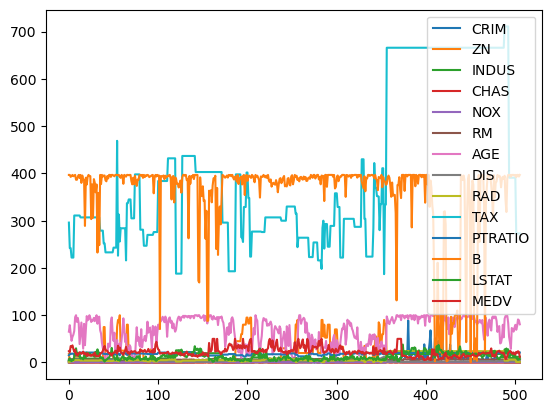

In [310]:
df.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

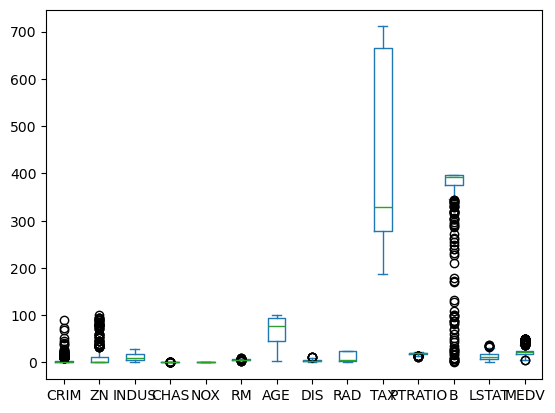

In [311]:
df.plot.box()
plt.show

In [345]:
#axis = 1 set krne se column wise operate hua, jisse ki pura column drop kiya 
#agr axis = 0 set krte, to row wise operate hota, or MEDV naam ke row ko drop krne ki kosis krta
#https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset - used this data preprocessing
#got to know, these variables works the best, he has done excellent job, check it out
#from my knowledge of graphs i got to know that, ZN,AGE,CHAS doesnt has that much effect in prediction
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS']
x = df.loc[:,column_sels]
y = df["MEDV"]

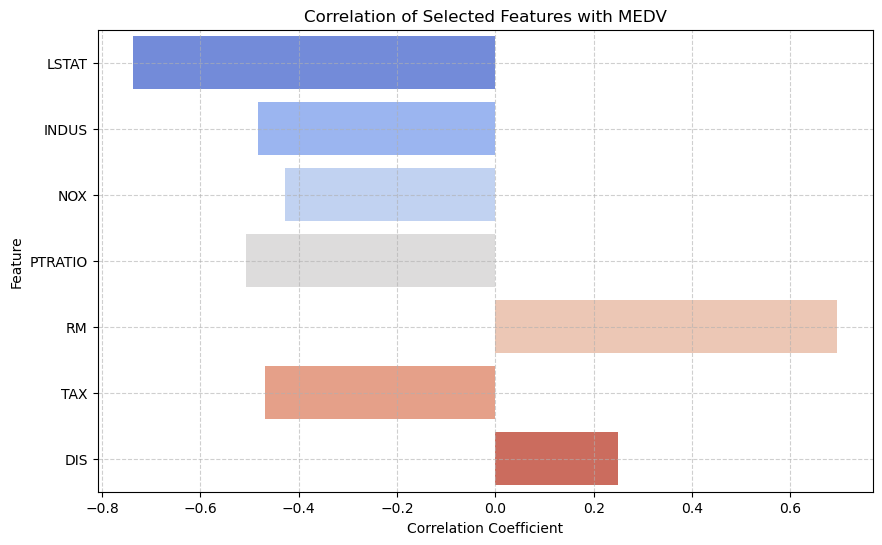

In [355]:

import seaborn as sns
import matplotlib.pyplot as plt

# Selected columns
columns_of_interest = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'MEDV']
subset = df[columns_of_interest]

# Calculate correlation with MEDV
medv_corr = subset.corr()['MEDV'].drop('MEDV')

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=medv_corr.values, y=medv_corr.index, palette='coolwarm')
plt.title("Correlation of Selected Features with MEDV")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [346]:
# feature normalization
# isse sare features ko same scale pe le aayege jisse LR use kr ke predict krne me easy ho
X_normalized = (X - X.min()) / (X.max() - X.min())
Xnp = X_normalized.values

In [347]:
print(np.max(Xnp, axis=0))
print(np.min(Xnp, axis=0))
print(np.mean(Xnp, axis=0))
print(np.std(Xnp, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0405441  0.39137752 0.06916996 0.34916679 0.52186901 0.24238128
 0.37171335 0.62292911 0.30140903]
[0.09658371 0.25123059 0.25374293 0.23819571 0.13449368 0.19129285
 0.37820222 0.23008566 0.19685435]


In [348]:
print(Xnp)

[[0.00000000e+00 6.78152493e-02 0.00000000e+00 ... 0.00000000e+00
  2.87234043e-01 8.96799117e-02]
 [2.35922539e-04 2.42302053e-01 0.00000000e+00 ... 4.34782609e-02
  5.53191489e-01 2.04470199e-01]
 [2.35697744e-04 2.42302053e-01 0.00000000e+00 ... 4.34782609e-02
  5.53191489e-01 6.34657837e-02]
 ...
 [6.11892474e-04 4.20454545e-01 0.00000000e+00 ... 0.00000000e+00
  8.93617021e-01 1.07891832e-01]
 [1.16072990e-03 4.20454545e-01 0.00000000e+00 ... 0.00000000e+00
  8.93617021e-01 1.31070640e-01]
 [4.61841693e-04 4.20454545e-01 0.00000000e+00 ... 0.00000000e+00
  8.93617021e-01 1.69701987e-01]]


In [349]:
import numpy as np
class LinearRegression:
    def __init__(self,lr=1e-5,n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weight = None
        self.bias = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weight = np.random.rand(num_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weight) + self.bias
            error = y_pred - y

            dw = (1 / num_samples) * np.dot(X.T, error)
            db = (1 / num_samples) * np.sum(error)

            # Debug print every 100 iterations or when NaN appears
            if i % 100 == 0 or np.isnan(dw).any() or np.isnan(db):
                print(f"Iteration {i}")
                print(f"dw: {dw}")
                print(f"db: {db}")
                print(f"weight: {self.weight}")
                print(f"bias: {self.bias}")
                print(f"y_pred[:5]: {y_pred[:5]}")
                print(f"error[:5]: {error[:5]}")

            # Detect crash
            if np.isnan(dw).any() or np.isnan(db):
                print("NaN occurred! Breaking loop.")
                break

            self.weight -= self.lr * dw
            self.bias -= self.lr * db

        return self

    def predict(self,X):
        return np.dot(X,self.weight)+self.bias

In [350]:
#dataframe ko ab array me convert kro taki values easy ho calculate krne me
Xnp = X.values
ynp = y.values

In [351]:
# Check shapes
print(Xnp.shape, ynp.shape)
ynp = ynp.ravel()

# Check NaNs
print(np.isnan(Xnp).any(), np.isnan(ynp).any())


(506, 9) (506,)
False False


In [352]:
#initialization and training of model
model = LinearRegression(lr=0.001, n_iters=1000)
model.fit(Xnp, ynp)

Iteration 0
dw: [194.16734148 336.41195925   0.89021416  13.31605654 124.15954848
  59.01718191 346.68451123 418.34449267 398.48614201]
db: 21.163059222535118
weight: [0.20366579 0.20395899 0.02675568 0.33402578 0.86403376 0.59352806
 0.93321557 0.6849299  0.89040354]
bias: 0
y_pred[:5]: [24.6075427  32.29675598 28.40691159 28.47442336 30.73869932]
error[:5]: [ 0.6075427  10.69675598 -6.29308841 -4.92557664 -5.46130068]
Iteration 100
dw: [-1.2475021  -1.68851147 -0.43439074 -0.28720648 -4.75437742  1.70260146
  1.00131805  0.23294267  2.52142625]
db: -0.45418528627729066
weight: [-0.16346968 -0.03906806  0.07553831  0.36263074  1.58741262  0.69028632
  0.02528246  0.95615753 -0.60500627]
bias: 0.06941911882823991
y_pred[:5]: [25.07530462 25.12072669 29.42509526 31.61568616 30.40024958]
error[:5]: [ 1.07530462  3.52072669 -5.27490474 -1.78431384 -5.79975042]
Iteration 200
dw: [-0.18197877 -0.19208729 -0.39348254 -0.23873511 -3.92514317  1.51382613
  0.23779292  0.93535496  0.18456663]
d

In [353]:
y_pred = model.predict(Xnp)

In [354]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Squared Error:", mean_squared_error(ynp, y_pred))
print("R² Score:", r2_score(ynp, y_pred))


Mean Squared Error: 31.412523621997476
R² Score: 0.6278999197308233
